In [1]:
import torch
import sbibm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import pickle

sns.set_theme()

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [58]:
task_name = 'lotka_volterra'
iterates = [0, 2000]
dfs = []
for iterate in iterates:
    df = pd.read_csv(f'{task_name}_epoch={iterate}.csv', header=None, index_col=0)
    df["epoch"] = iterate
    dfs.append(df)

In [59]:
df = pd.concat(dfs)

[None, None]

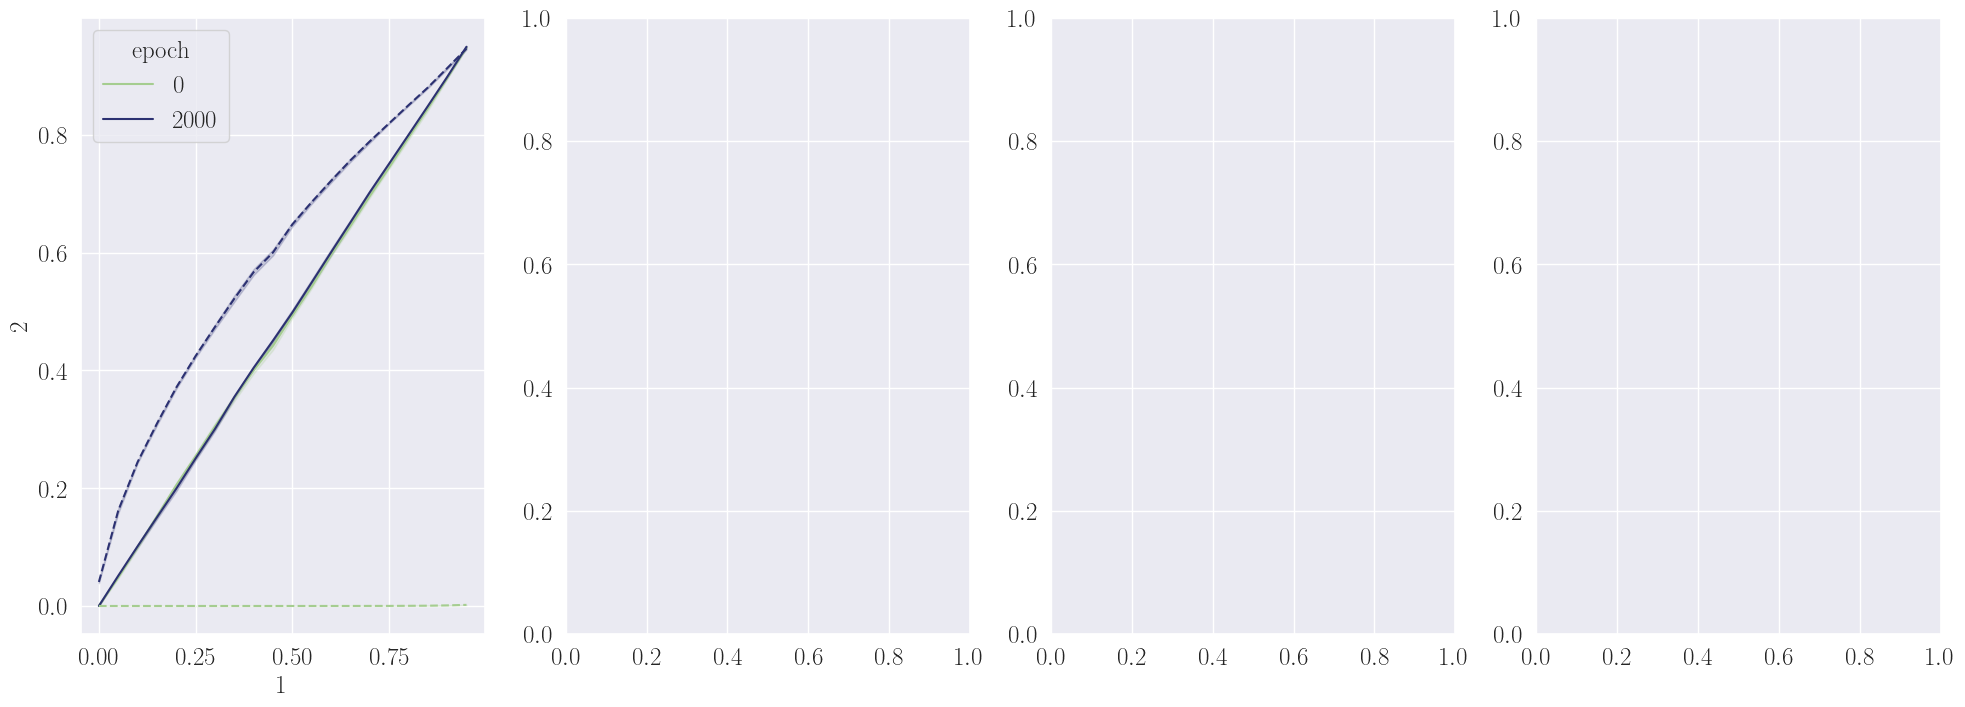

In [60]:

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(24,8))
sns.set_palette("crest")
gfg = sns.lineplot(data=df, x=1, y=2, ax=axs[0], hue="epoch", legend="auto", palette="crest")
sns.lineplot(data=df, x=1, y=3, ax=axs[0], linestyle='--', hue="epoch", legend=False, palette="crest")
# gfg.legend(fontsize=18)
plt.setp(gfg.get_legend().get_texts(), fontsize=18) 
plt.setp(gfg.get_legend().get_title(), fontsize=18) 

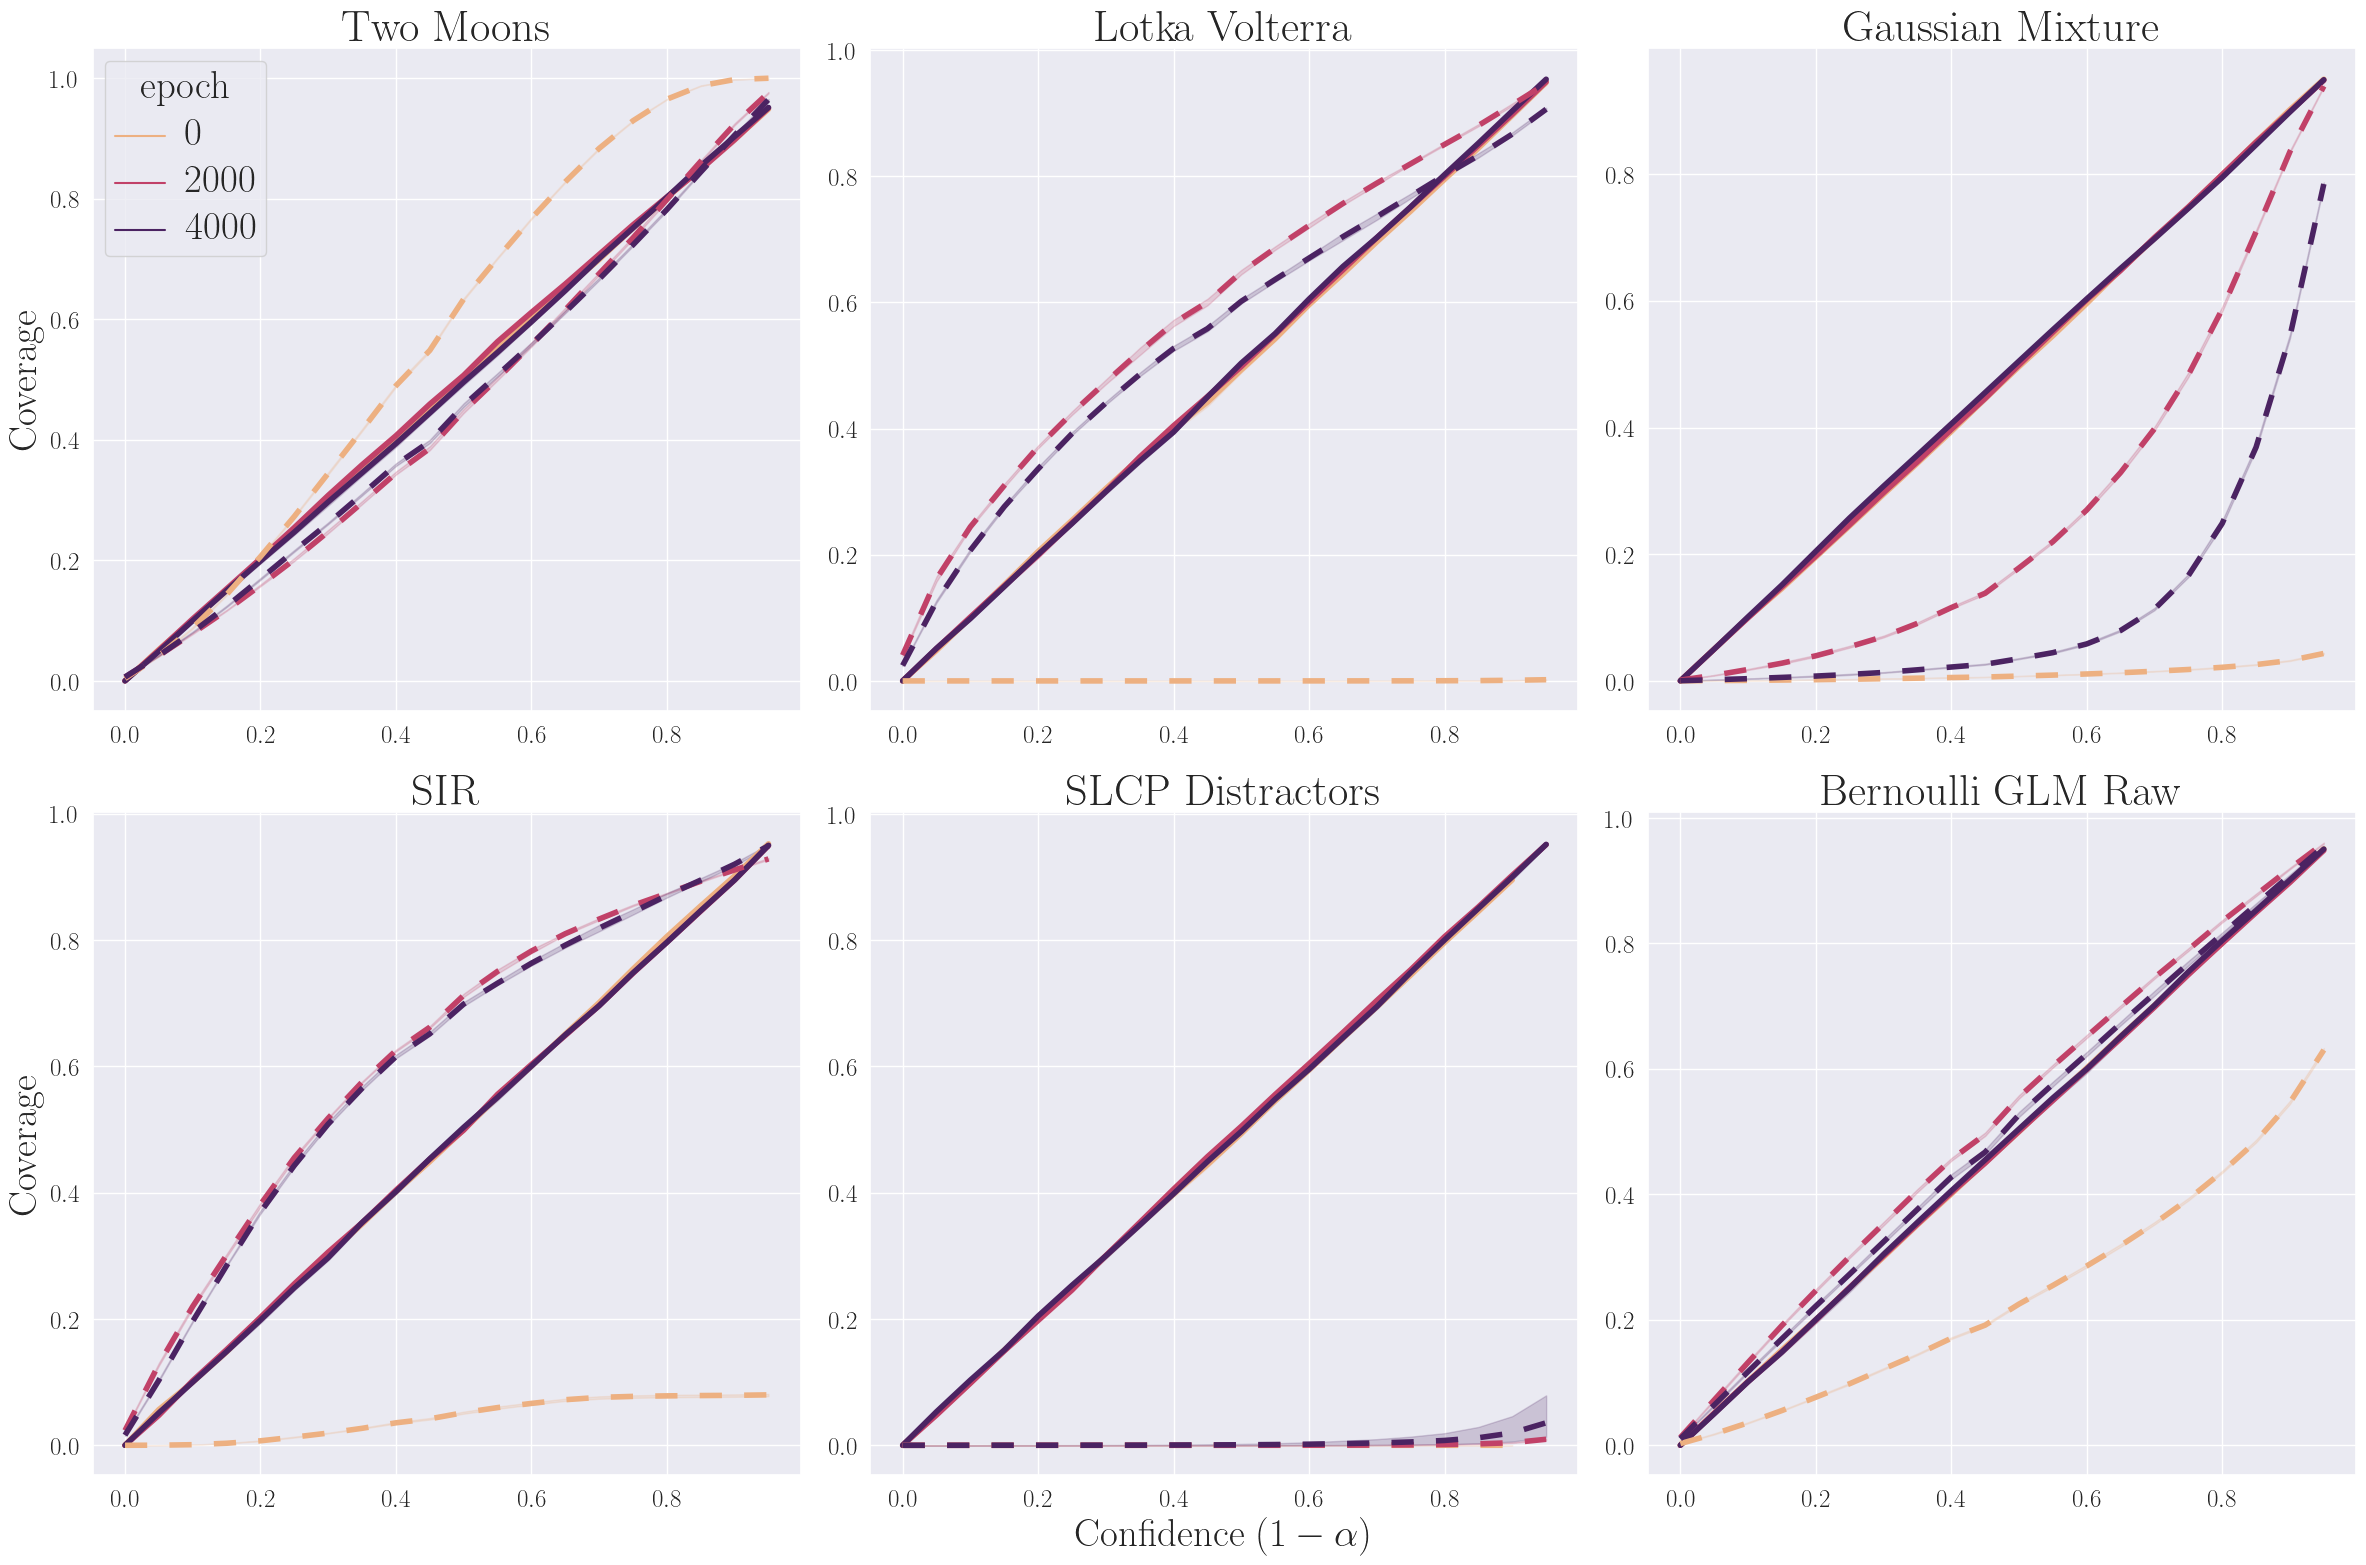

In [61]:
task_names = [
    "two_moons",
    "lotka_volterra",
    "gaussian_mixture",
    "sir",
    "slcp_distractors",
    "bernoulli_glm_raw",
]

task_name_titles = [
    'Two Moons',
    'Lotka Volterra',
    'Gaussian Mixture',
    'SIR',
    'SLCP Distractors',
    'Bernoulli GLM Raw',
]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,16))
# axs[0].set_ylabel("$\mathbb{E}_X[\mathcal{L}(\cdot)]$",fontsize=24)
for i, task_name in enumerate(task_names):
    ax = axs[i // 3, i - 3 * (i // 3)]
    
    ax.set_title(task_name_titles[i], fontsize=32)
    
    if i == 4:
        ax.set_xlabel(r"Confidence $(1-\alpha)$",fontsize=28)
    else:
        ax.set_xlabel(" ")

    if i == 0 or i == 3:
        ax.set_ylabel("Coverage",fontsize=28)
    else:
        ax.set_ylabel(" ")
    
    iterates = [0, 2000, 4000]
    dfs = []
    for iterate in iterates:
        df = pd.read_csv(f'{task_name}_epoch={iterate}.csv', header=None, index_col=0)
        df["epoch"] = iterate
        dfs.append(df)
    df = pd.concat(dfs)
    df_filtered = df[np.logical_or(df[1] == 0.0, df[2] != 0.0)] # occasional invalid trials

    if i == 0:
        gfg = sns.lineplot(data=df_filtered, x=1, y=2, ax=ax, hue="epoch", legend="auto", palette="flare", lw=4)
        plt.setp(gfg.get_legend().get_texts(), fontsize=28) 
        plt.setp(gfg.get_legend().get_title(), fontsize=28) 
    else:
        sns.lineplot(data=df_filtered, x=1, y=2, ax=ax, hue="epoch", legend=False, palette="flare", lw=4)
    gfg = sns.lineplot(data=df_filtered, x=1, y=3, ax=ax, hue="epoch", legend=False, palette="flare", dashes=(4, 4), lw=4)
    # break
plt.tight_layout()
plt.savefig(f"sbi_coverages.png")

In [27]:
task_name = "slcp_distractors"
dfs = []
for iterate in iterates:
    df = pd.read_csv(f'{task_name}_epoch={iterate}.csv', header=None, index_col=0)
    df["epoch"] = iterate
    dfs.append(df)
df = pd.concat(dfs)

In [54]:
df_filtered = df[np.logical_or(df[1] == 0.0, df[2] != 0.0)]

In [55]:
df_filtered

,1,2,3,epoch
0,,,,
0,0.00,0.0001,0.0031,0
1,0.05,0.0492,0.0179,0
2,0.10,0.1038,0.0363,0
3,0.15,0.1544,0.0557,0
4,0.20,0.2041,0.0772,0
...,...,...,...,...
15,0.75,0.7600,0.7718,4000
16,0.80,0.8083,0.8170,4000
17,0.85,0.8536,0.8631,4000


<Axes: xlabel='1', ylabel='2'>

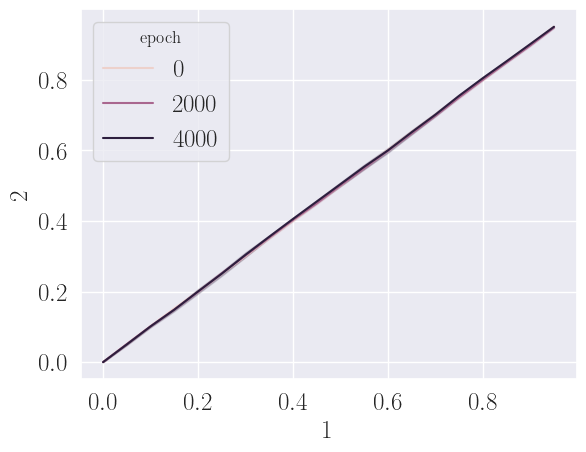

In [56]:
sns.lineplot(data=df_filtered, x=1, y=2, hue="epoch")